In [ ]:
import pandas as pd

# Dados
dados = {
    'Estado': ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Paraná', 'Rio Grande do Sul',
               'Rondônia', 'Tocantins', 'Acre', 'Amapá', 'Roraima'],
    '2020': [19089286, 6595668, 4715404, 4690887, 4528209, 310625, 235519, 95888, 90561, 82922],
    '2021': [19305526, 6780268, 4803503, 4806137, 4609037, 322046, 247325, 99176, 93949, 86924],
    '2022': [19632285, 7018707, 4857398, 4898356, 4682229, 330443, 256233, 101550, 96391, 91250],
    '2024': [20032335, 7188271, 4920814, 5002187, 4772945, 339823, 266916, 104282, 99588, 94959]
}

# Criar o DataFrame
df = pd.DataFrame(dados)

# Transformar o DataFrame para formato longo (uma linha por ano por estado)
df_long = df.melt(id_vars=['Estado'], value_vars=['2020', '2021', '2022', '2024'],
                  var_name='Ano', value_name='Quantidade de Veículos')

# Exibir o DataFrame resultante
print(df_long)


               Estado   Ano  Quantidade de Veículos
0           São Paulo  2020                19089286
1        Minas Gerais  2020                 6595668
2      Rio de Janeiro  2020                 4715404
3              Paraná  2020                 4690887
4   Rio Grande do Sul  2020                 4528209
5            Rondônia  2020                  310625
6           Tocantins  2020                  235519
7                Acre  2020                   95888
8               Amapá  2020                   90561
9             Roraima  2020                   82922
10          São Paulo  2021                19305526
11       Minas Gerais  2021                 6780268
12     Rio de Janeiro  2021                 4803503
13             Paraná  2021                 4806137
14  Rio Grande do Sul  2021                 4609037
15           Rondônia  2021                  322046
16          Tocantins  2021                  247325
17               Acre  2021                   99176
18          

1. Análise de Crescimento de Veículos por Estado

Calcular a variação no número de veículos de ano para ano em cada estado.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrando os dados para os anos relevantes e estados
df_long = df.melt(id_vars=['Estado'], value_vars=['2020', '2021', '2022', '2024'], var_name='Ano', value_name='Quantidade de Veículos')

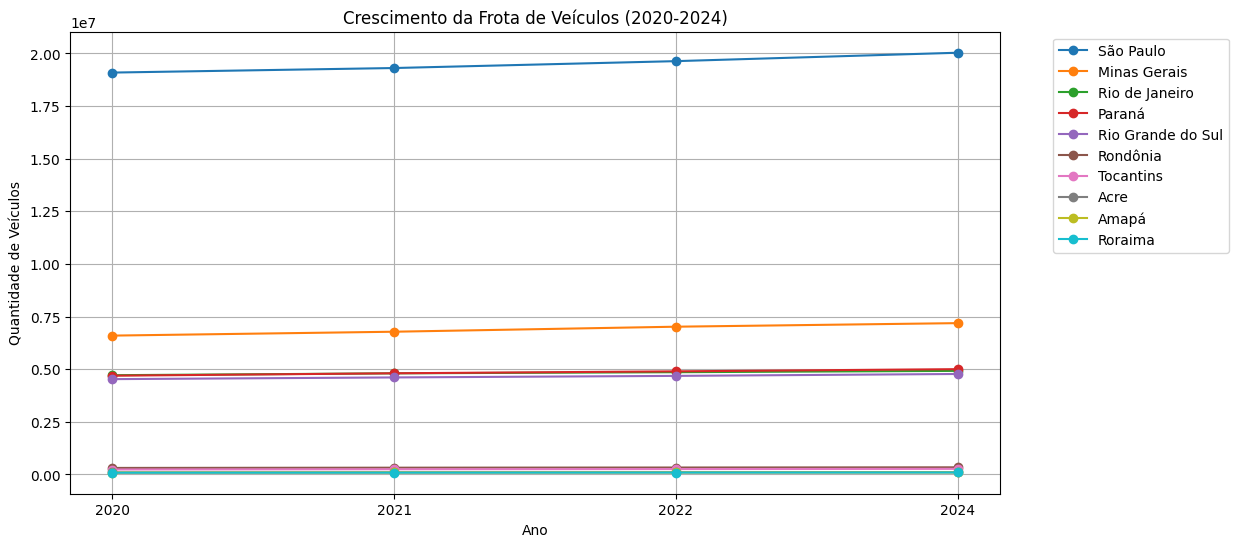

In [ ]:
# Plotar o crescimento da frota de veículos ao longo dos anos
plt.figure(figsize=(12, 6))
for estado in df['Estado']:
  subset = df_long[df_long['Estado'] == estado]
  plt.plot(subset['Ano'], subset['Quantidade de Veículos'], marker='o', label=estado)

plt.title('Crescimento da Frota de Veículos (2020-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Veículos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

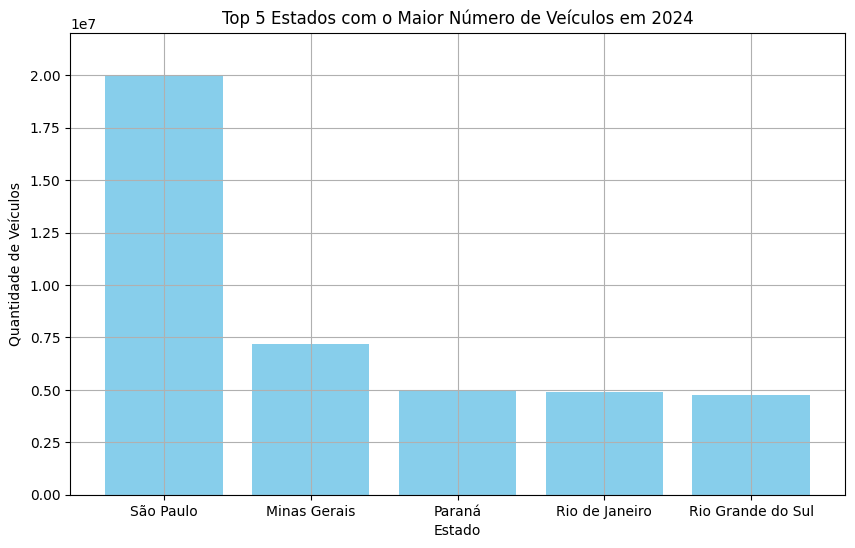

In [ ]:
# Filtrar os dados para o ano de 2024
df_2024 = df_long[df_long['Ano'] == '2024']

# Identificar os 5 Estados com o maior número de veículos em 2024
top_5_estados = df_2024.nlargest(5, 'Quantidade de Veículos')

# Plotar os dados
plt.figure(figsize=(10, 6))

plt.bar(top_5_estados['Estado'], top_5_estados['Quantidade de Veículos'], color='skyblue')
plt.title('Top 5 Estados com o Maior Número de Veículos em 2024')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Veículos')
plt.ylim(0, max(top_5_estados['Quantidade de Veículos']) * 1.1)
plt.grid(True)
plt.show()



In [ ]:

# Calculando a taxa de crescimento anual para cada estado
df.set_index('Estado', inplace=True)
crescimento_anual = df.pct_change(axis='columns') * 100

# Exibindo a taxa de crescimento anual
print(crescimento_anual)


                   2020      2021      2022      2024
Estado                                               
São Paulo           NaN  1.132782  1.692567  2.037715
Minas Gerais        NaN  2.798807  3.516660  2.415887
Rio de Janeiro      NaN  1.868323  1.121994  1.305555
Paraná              NaN  2.456891  1.918776  2.119711
Rio Grande do Sul   NaN  1.784988  1.588011  1.937453
Rondônia            NaN  3.676781  2.607391  2.838614
Tocantins           NaN  5.012759  3.601739  4.169252
Acre                NaN  3.429001  2.393724  2.690300
Amapá               NaN  3.741125  2.599283  3.316700
Roraima             NaN  4.826222  4.976761  4.064658


In [ ]:
# Criar o DataFrame
df = pd.DataFrame(dados)

In [ ]:
# Preparar os dados para a regressão
ano = np.array([2020, 2021, 2022, 2024]).reshape(-1, 1)
resultados = {}

In [ ]:
# Ajustar o modelo de regressão para cada estado
for estado in df['Estado']:
  quantidade_veiculos = df.loc[df['Estado'] == estado, ['2021', '2022', '2024']].values.flatten().reshape(-1, 1)
  modelo = LinearRegression().fit(anos, quantidade_veiculos)
  previsoes = modelo.predict(np.array([2025, 2026, 2027]).reshape(-1, 1))
  resultados[estado] = previsoes.flatten()

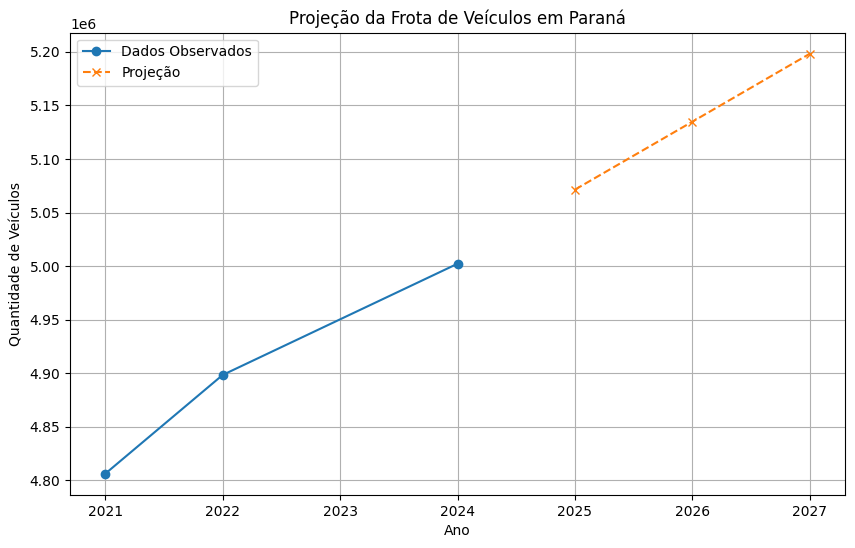

In [ ]:
# Plotar as projeções para um estado específico
estado_selecionado = 'Paraná'
plt.figure(figsize=(10, 6))
plt.plot(anos, df.loc[df['Estado'] == estado_selecionado, ['2021', '2022', '2024']].values.flatten(), marker='o', label='Dados Observados')
plt.plot([2025, 2026, 2027], resultados[estado_selecionado], marker='x', linestyle='--', label='Projeção')
plt.title(f'Projeção da Frota de Veículos em {estado_selecionado}')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Veículos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filtrar os dados para o estado do Paraná
df_parana = df[df['Estado'] == 'Paraná']

In [ ]:
# Transformar o DataFrame para formato longo
df_parana_long = df_parana.melt(id_vars=['Estado'], value_vars=['2020', '2021', '2022', '2024'],
                                var_name='Ano', value_name='Quantidade de Veículos')

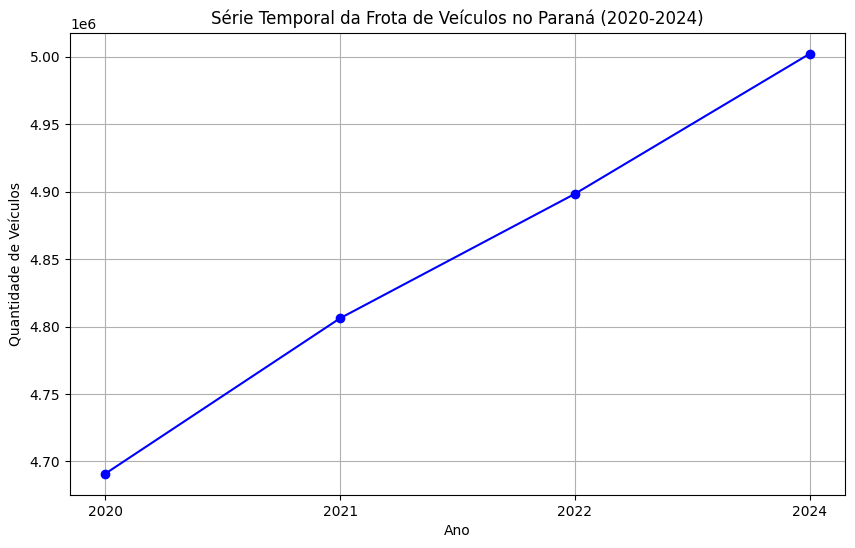

In [ ]:
# Plotar a série temporal para o estado do Paraná
plt.figure(figsize=(10, 6))
plt.plot(df_parana_long['Ano'], df_parana_long['Quantidade de Veículos'], marker='o', linestyle='-', color='b')
plt.title('Série Temporal da Frota de Veículos no Paraná (2020-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Veículos')
plt.grid(True)
plt.show()

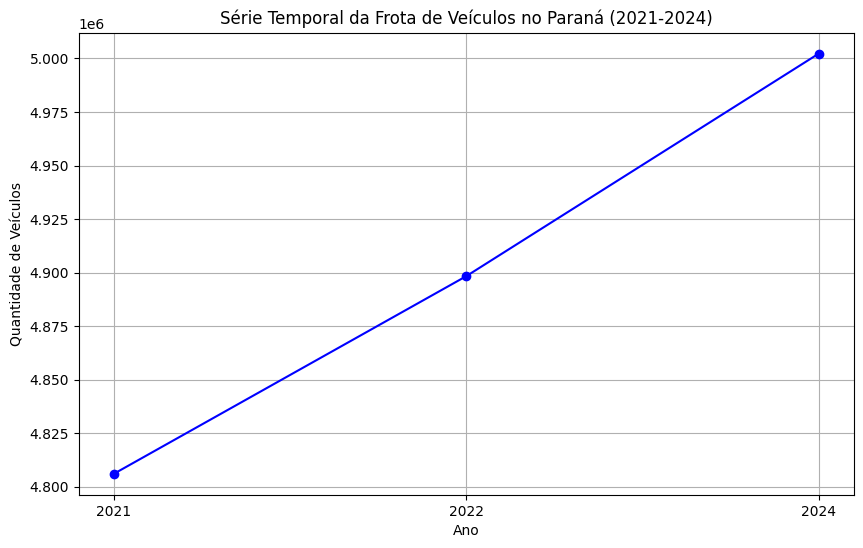

In [ ]:
# Transformar o DataFrame para formato longo
df_parana_long = df_parana.melt(id_vars=['Estado'], value_vars=['2021', '2022', '2024'],
                                var_name='Ano', value_name='Quantidade de Veículos')

# Plotar a série temporal para o estado do Paraná (2021-2024)
plt.figure(figsize=(10, 6))
plt.plot(df_parana_long['Ano'], df_parana_long['Quantidade de Veículos'], marker='o', linestyle='-', color='b')
plt.title('Série Temporal da Frota de Veículos no Paraná (2021-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Veículos')
plt.grid(True)
plt.show()